# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

#### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x)

In [3]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


In [4]:
user_similarity = pairwise_distances(raitings, metric='cosine')
user_similarity

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [5]:
for g, vector in enumerate (user_similarity):
    print('Пользователь',g,'и пользователь',  list(vector).index(np.min(vector[np.nonzero(vector)])))     

Пользователь 0 и пользователь 8
Пользователь 1 и пользователь 4
Пользователь 2 и пользователь 9
Пользователь 3 и пользователь 9
Пользователь 4 и пользователь 8
Пользователь 5 и пользователь 9
Пользователь 6 и пользователь 3
Пользователь 7 и пользователь 5
Пользователь 8 и пользователь 0
Пользователь 9 и пользователь 2


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [6]:
from sklearn.decomposition import PCA

In [7]:
X = raitings
pca = PCA(n_components = 5)
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

# Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [8]:
from sympy import *
import numpy as np
from scipy.misc import derivative

x = symbols('x')
x = 1
def f(x):
    return np.tan(np.sin(x)+np.cos(2*x+3))**2


derivative(f, 1.0, dx=1e-6, n = 1)

55.3859176464222

y = (tan^2⁡(sin⁡(2*x)+cos⁡(2*x+3))

y' = (tan^2⁡(sin⁡(2*x)+cos⁡(2*x+3))' = 2*(tan⁡(sin⁡(2*x)+cos⁡(2*x+3))*(tan⁡(sin⁡(2*x)+cos⁡(2*x+3))' 

= 2*(tan⁡(sin⁡(2*x)+cos⁡(2*x+3))* (1/cos^2(sin⁡(2*x)+cos⁡(2*x+3)))*⁡(sin⁡(x)+cos⁡(2*x+3))'

= 2*(tan⁡(sin⁡(2*x)+cos⁡(2*x+3))* (1/cos^2(sin⁡(2*x)+cos⁡(2*x+3)))*⁡((sin⁡(x))'+(cos⁡(2*x+3))' 

= 2*(tan⁡(sin⁡(2*x)+cos⁡(2*x+3))* (1/cos^2(sin⁡(2*x)+cos⁡(2*x+3)))*⁡(⁡cos(x)+(-sin(2*x+3)*(2*x)'))
 
= 2*(tan⁡(sin⁡(2*x)+cos⁡(2*x+3))* (1/cos^2(sin⁡(2*x)+cos⁡(2*x+3)))*⁡(⁡cos(x)+(-sin(2*x+3)*2*1))

если x = 1, то:

2*(tan⁡(sin⁡(2*1)+cos⁡(2*1+3))* (1/cos^2(sin⁡(2*1)+cos⁡(2*1+3)))*⁡(⁡cos(1)+(-sin(2*1+3)*(2*1)')

= 2*2,093*5,3818*(0,5403+(-(-0,958924))*2*1) ≈ 55,4

# Задание 3¶
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [9]:
i = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [10]:
def f(x):
    return np.e**x[0] * np.sin(x[1]*i) + i

In [11]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

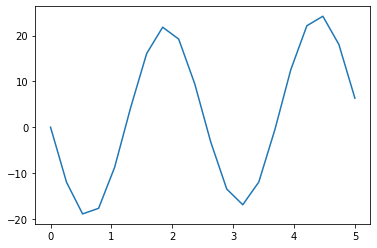

In [12]:
plt.plot(i, fx)
plt.show()

In [13]:
# for g in i:
#     def f(x, i):
#         return np.e**x[0] * np.sin(x[1]*i) + i
#     print(f(x, i))

In [14]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [15]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

In [17]:
# for g in i:
#     f(x)
res = differential_evolution(f, [(0, 5), (0, 5)], disp=True)

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

# Не могу уловить мысль, помогите

# Задание 4¶

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [20]:
data = [np.random.randint( low =1 , high =11, size = 50)  for _ in range(1000)]
data

[array([ 3,  3,  7,  5,  1,  3,  9,  4,  2,  7,  4,  9,  7, 10,  2,  8,  5,
         2,  5,  4, 10,  1,  4, 10, 10,  7,  7,  6,  5,  2, 10,  9,  1,  7,
         3,  4,  7,  2,  8,  1,  2,  3,  6,  9,  5,  3,  3,  8,  5,  6]),
 array([10,  9,  4,  7,  6,  9,  7,  3,  8,  1,  8,  5,  9,  1,  8,  3,  7,
         4,  3,  4,  4,  3,  1,  6,  4,  2,  9,  4,  3,  8,  1,  1, 10,  3,
         4,  1,  8,  9,  1, 10,  5,  1,  6,  5,  5,  5,  9,  5,  6,  6]),
 array([ 6,  8,  2,  5,  3,  7,  5,  1,  1,  9,  2,  7,  3,  5,  2,  9,  4,
         6,  3,  2,  3,  6,  5,  7, 10,  7,  2,  8,  6,  5,  9,  9,  4,  8,
         9,  8,  2,  5,  9,  4,  4,  5,  5,  1,  3,  1,  5,  6, 10,  3]),
 array([ 5,  7,  8,  1,  5,  9,  8,  1,  9,  4,  9,  9,  5,  7,  6,  1,  4,
         1,  2,  4,  7,  1, 10,  3, 10,  1,  9,  2,  5, 10,  5,  6, 10,  4,
         3, 10, 10,  6,  1,  9,  6,  6,  6,  2,  8,  3,  1,  2,  6,  3]),
 array([ 4,  1,  9,  7,  8,  3,  4,  7,  4, 10,  6,  5,  7,  8, 10,  9,  4,
         7,  2,  2, 

In [24]:
data2 = []
for m in data:
    data_mean = np.mean(m)
    data2.append(data_mean)

[5.28,
 5.22,
 5.18,
 5.4,
 5.4,
 5.58,
 5.9,
 5.48,
 5.88,
 5.74,
 5.6,
 5.54,
 5.5,
 5.36,
 5.9,
 5.28,
 5.6,
 5.26,
 5.38,
 5.28,
 5.14,
 5.72,
 5.06,
 5.64,
 5.18,
 5.32,
 5.52,
 6.0,
 5.98,
 5.16,
 5.24,
 5.12,
 4.78,
 5.76,
 5.46,
 5.14,
 6.26,
 5.62,
 4.98,
 5.48,
 6.04,
 5.48,
 4.38,
 5.88,
 5.32,
 6.0,
 6.08,
 5.1,
 5.6,
 5.28,
 5.8,
 5.7,
 5.4,
 5.7,
 5.82,
 6.12,
 5.4,
 5.22,
 6.54,
 4.7,
 5.84,
 5.24,
 5.06,
 5.18,
 5.46,
 5.6,
 5.24,
 5.72,
 5.88,
 5.04,
 4.9,
 5.22,
 5.6,
 5.42,
 4.98,
 5.64,
 5.0,
 5.72,
 5.2,
 5.76,
 6.16,
 5.32,
 5.8,
 5.56,
 5.62,
 5.06,
 5.5,
 5.7,
 5.04,
 5.38,
 5.8,
 6.1,
 5.38,
 5.26,
 5.52,
 5.64,
 5.18,
 5.26,
 5.36,
 5.76,
 5.78,
 6.28,
 5.76,
 6.04,
 5.28,
 6.18,
 5.24,
 5.4,
 5.4,
 5.94,
 5.6,
 5.96,
 5.74,
 4.5,
 5.78,
 5.84,
 5.02,
 5.5,
 5.78,
 6.1,
 5.0,
 6.0,
 5.56,
 5.3,
 4.8,
 5.44,
 5.5,
 4.9,
 6.06,
 5.78,
 5.72,
 5.88,
 4.9,
 4.86,
 5.46,
 5.84,
 5.34,
 5.56,
 5.62,
 5.54,
 5.96,
 5.06,
 5.22,
 5.76,
 6.26,
 5.02,
 5.62,
 5.6,
 5.78

(array([  7.,  11.,  59., 130., 216., 251., 182., 100.,  36.,   8.]),
 array([4.2  , 4.446, 4.692, 4.938, 5.184, 5.43 , 5.676, 5.922, 6.168,
        6.414, 6.66 ]),
 <BarContainer object of 10 artists>)

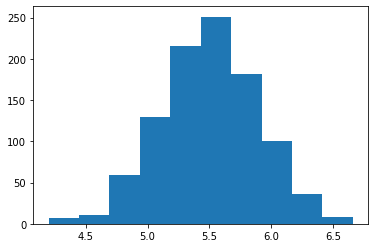

In [25]:
plt.hist(data2)

# Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])
              
print(m)

In [27]:
from numpy import linalg as LA
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [31]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


m = [1, 4][1 , 1]  → → →[1-λ, 4][1 , 1-λ] = 0 → → → (1-λ)*(1-λ)-4*1 = 1* 1 -1 * λ - λ + λ^2-4 = λ^2 -2 * λ-3 =0

  
λ1 = 3 ; λ2 = -1

λ1 = 3 

(1-3) * x + 4 * y =0 ;
1 * x + (1-3) * y =0

v1 = [x,y] = [2, 1 ] 


λ2 = - 1

(1+1) * x + 4 * y =0 ;
1 * x + (1+1) * y =0

v2 = [x,y] = = [-2, 1 ]

Но почему то вектора не сошлись, не пойму где ошиблась